In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [481]:
#Load the dataset
employee_data = pd.read_csv("test.csv", index_col='Employee ID')

In [483]:
employee_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Employee ID,,,,,,,,,,,,,,,,,,,,,
52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
30585,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,4,Entry,Medium,27,No,No,No,Good,High,Left
54656,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
33442,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
15667,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [485]:
#check missing values
print(employee_data.isnull().sum())

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [487]:
def plot_density_attrition_with_Income_And_Promotions():
    """
    Generate density plots for attrition by Monthly Income differentiated
    by Number of Promotions.
    """
    employee_data = pd.read_csv("test.csv", index_col='Employee ID')
    # Convert 'Attrition' column to numeric: 0 for 'Stayed' and 1 for 'Left'
    employee_data['Attrition'] = employee_data['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)
    
    plt.figure(figsize=(14, 8))
    
    #define colur Bold blue and red
    colors = ['#1f77b4', '#d62728']

    #Plot density plot for Stayed
    sns.kdeplot(
        data=employee_data[employee_data['Attrition'] == 0],
        x='Monthly Income',
        y='Number of Promotions',
        fill=True,
        cmap=sns.light_palette(colors[0], as_cmap=True),
        alpha=0.8
    )

    #Plot density plot for Left
    sns.kdeplot(
        data=employee_data[employee_data['Attrition'] == 1],
        x='Monthly Income',
        y='Number of Promotions',
        fill=True,
        cmap=sns.light_palette(colors[1], as_cmap=True),
        alpha=0.8
    )

    plt.title('Density Plot of Monthly Income vs Number of Promotions (Colored by Attrition)', fontsize=16)
    plt.xlabel('Monthly Income', fontsize=14)
    plt.ylabel('Number of Promotions', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    #Add a legend
    plt.plot([], [], color=colors[0], label='Stayed')  # Dummy line for "Stayed"
    plt.plot([], [], color=colors[1], label='Left')    # Dummy line for "Left"
    plt.legend(title='Attrition', fontsize=12)

    plt.tight_layout()

    # Save as PNG image
    plt.savefig("Density_Attrition.png", dpi=300, bbox_inches='tight')
    plt.show()


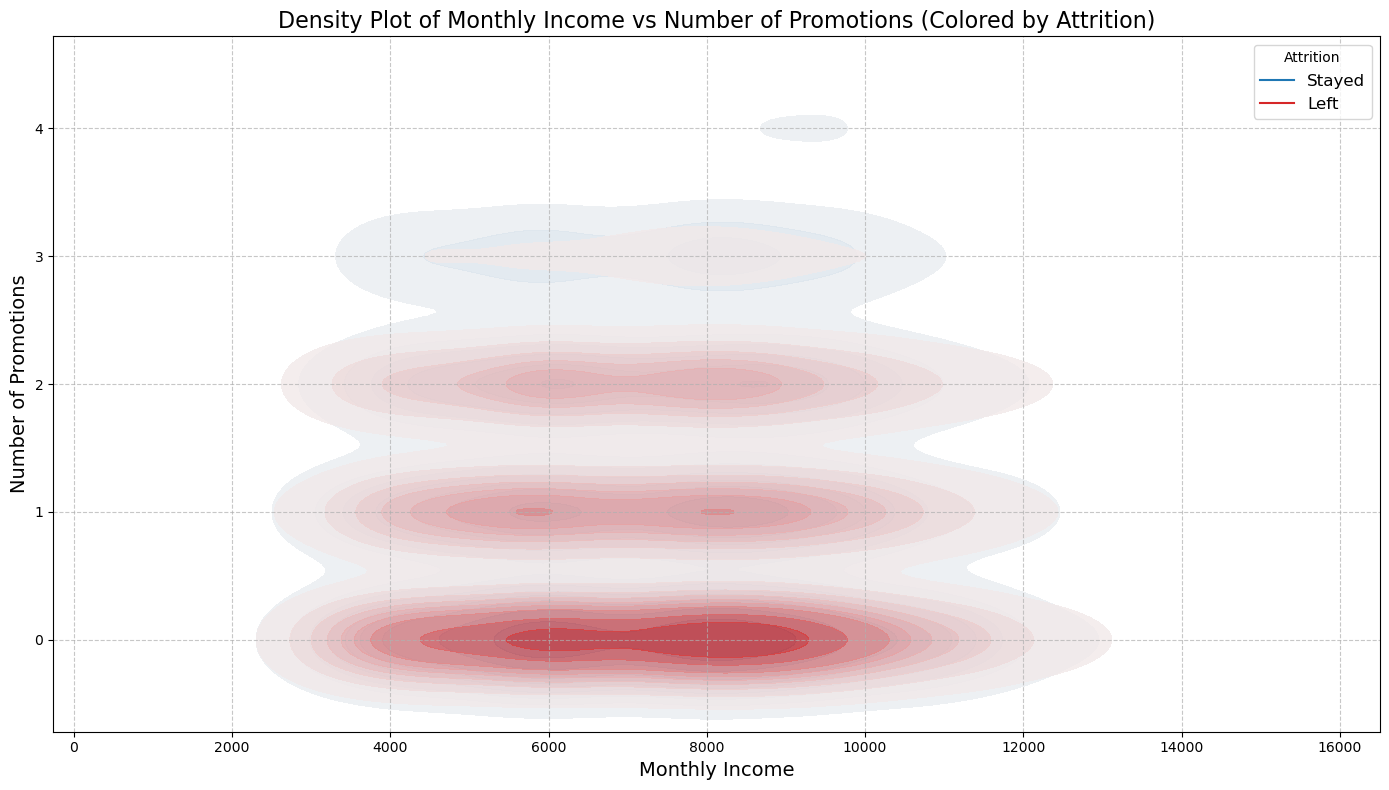

In [489]:
# Call the function
plot_density_attrition_with_Income_And_Promotions()

In [491]:
def line_plot_attrition_trends():
    """
    Generate line plots for attrition rates by years at company differentiated by job level 
    and leadership opportunities.
    """
    employee_data = pd.read_csv("test.csv", index_col='Employee ID')
    #Convert 'Attrition' column to numeric: 0 for 'Stayed' and 1 for 'Left'
    employee_data['Attrition'] = employee_data['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)

    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))

    #Line plot for attrition by years at company, differentiated by Job Level
    sns.lineplot(data=employee_data, x='Years at Company', y='Attrition', 
                 hue='Job Level', palette='Set2', marker='o', linewidth=2, ax=axes[0])

    #Calculate average attrition rate
    avg_attrition_rate = employee_data['Attrition'].mean()

    #Add a horizontal line for the overall average attrition rate
    axes[0].axhline(avg_attrition_rate, linestyle='--', color='gray', label=f'Avg Attrition Rate: {avg_attrition_rate:.2f}')

    # Mark the high attrition year with a star
    attrition_by_years = employee_data.groupby('Years at Company')['Attrition'].mean()
    high_attrition_year = attrition_by_years.idxmax() 
    axes[0].scatter(high_attrition_year, attrition_by_years.max(), color='red', s=100, marker='*', label=f'High Attrition Year: {high_attrition_year}')

    axes[0].set_title('Attrition Rates by Years at Company: Influence of Job Level', fontsize=16)
    axes[0].set_xlabel('Years at Company', fontsize=14)
    axes[0].set_ylabel('Attrition Rate', fontsize=14)
    axes[0].grid(True)
    axes[0].legend(title='Job Level')

    #Line plot for attrition by years at company, differentiated by Leadership Opportunities
    sns.lineplot(data=employee_data, x='Years at Company', y='Attrition', 
                 hue='Leadership Opportunities', palette='coolwarm', marker='o', linewidth=2, ax=axes[1])

    axes[1].axhline(avg_attrition_rate, linestyle='--', color='gray', label=f'Avg Attrition Rate: {avg_attrition_rate:.2f}')
    axes[1].set_title('Attrition Rates by Years at Company: Impact of Leadership Opportunities', fontsize=16)
    axes[1].set_xlabel('Years at Company', fontsize=14)
    axes[1].set_ylabel('Attrition Rate', fontsize=14)
    axes[1].grid(True)
    axes[1].legend(title='Leadership Opportunities')

    axes[0].annotate(f'High Attrition Year: {high_attrition_year}', xy=(high_attrition_year, attrition_by_years.max()), 
                     xytext=(high_attrition_year + 1, attrition_by_years.max() - 0.05),
                     arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12, color='red')
    plt.tight_layout()

    # Save as PNG image
    plt.savefig("Line_Attrition.png", dpi=300, bbox_inches='tight')
    plt.show()


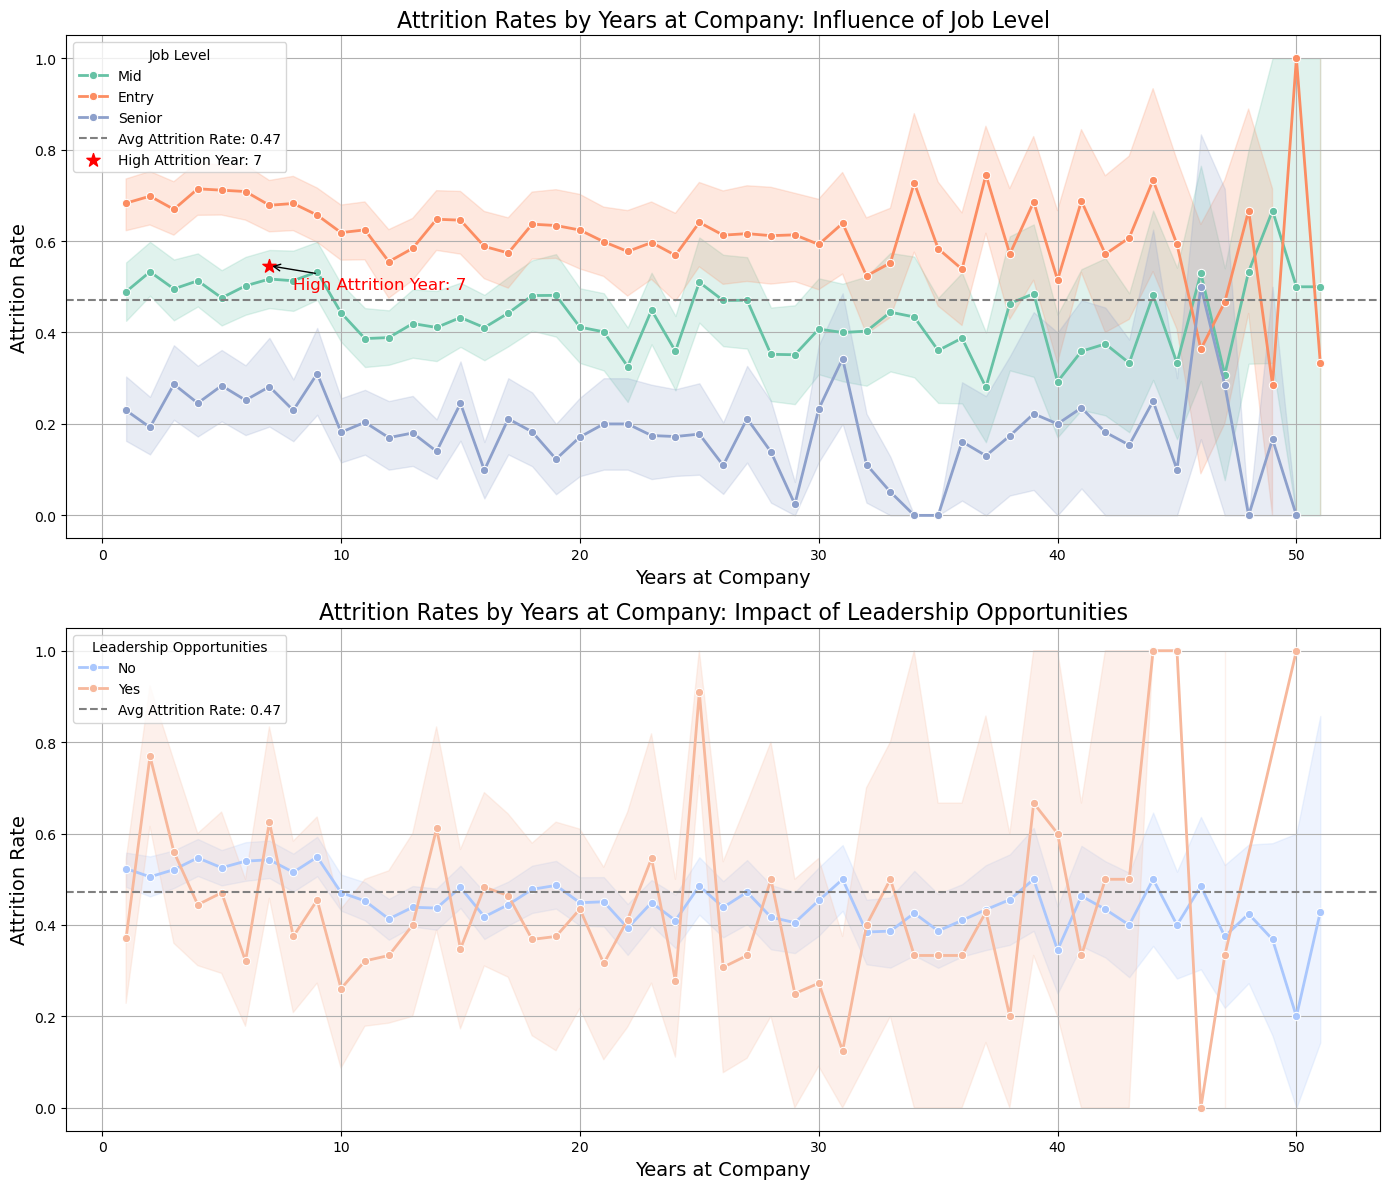

In [497]:
# Call the function
line_plot_attrition_trends()

In [499]:
def plot_attrition_by_remote_and_distance():
    """
    Generates a facet grid plot showing the relationship between Distance from Home, Remote Work,
    and Attrition with stacked histograms and KDE curves, using Attrition
    """
    employee_data = pd.read_csv("test.csv", index_col='Employee ID')
    # Set plot size
    plt.figure(figsize=(14, 8))

    # Create a facet grid
    g = sns.FacetGrid(employee_data, col='Remote Work', hue='Attrition', height=6, aspect=1.5)

    # Map the plot function and enable the legend for hue
    g.map(sns.histplot, 'Distance from Home', bins=20, kde=True, multiple="stack")

    # Set axis labels and title
    g.set_axis_labels('Distance from Home (miles)', 'Count')
    g.set_titles('Remote Work: {col_name}')
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Attrition by Remote Work and Distance from Home', fontsize=16)

    # Add a global legend for Attrition hue
    g.add_legend(title="Attrition", loc='upper right', bbox_to_anchor=(0.9, 0.6))

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    #Add Grid
    for ax in g.axes.flat:
        ax.grid(True)

    # Save as PNG image
    plt.savefig("Remote.png", dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()


<Figure size 1400x800 with 0 Axes>

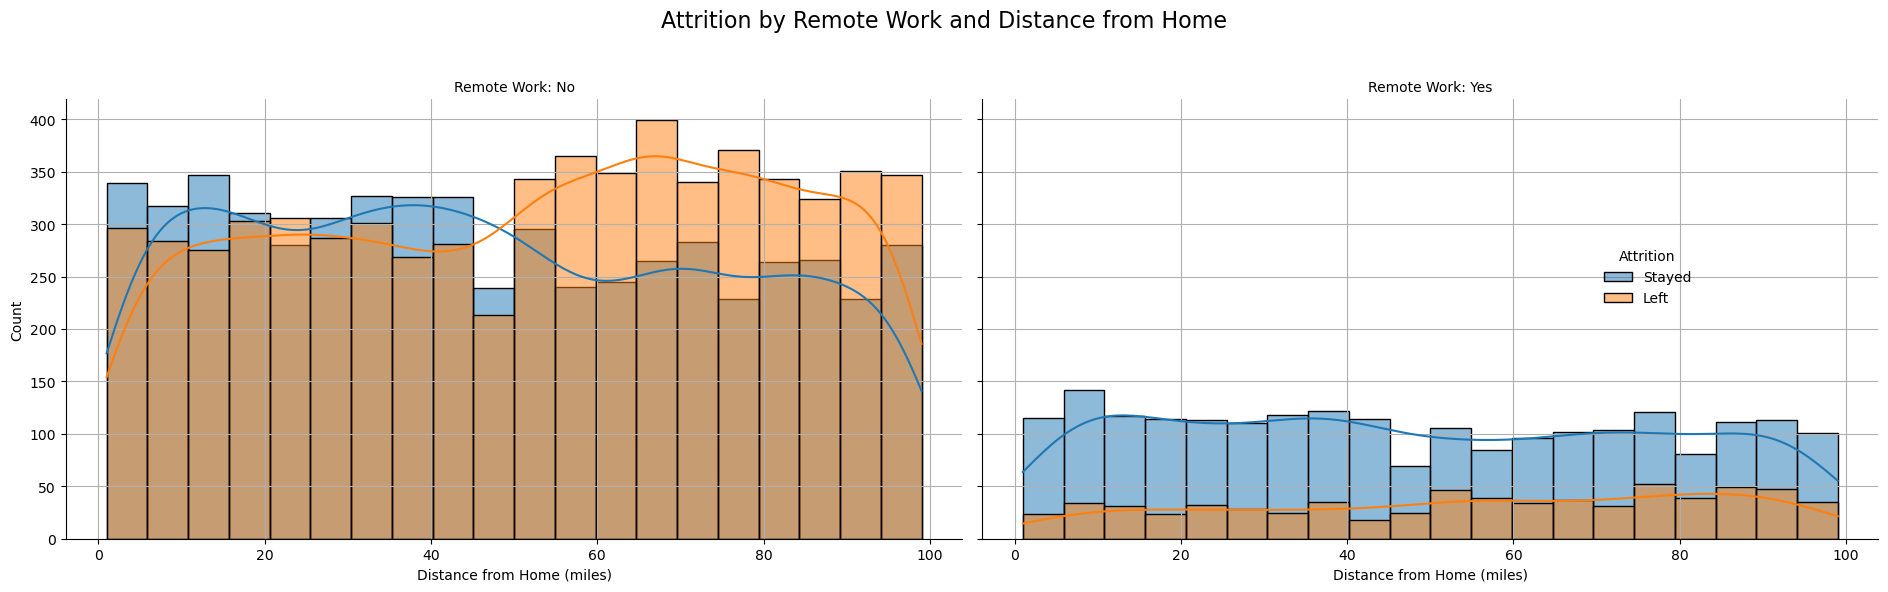

In [501]:
# Call the function
plot_attrition_by_remote_and_distance()

In [503]:
def plot_density_attrition_with_age_and_dependents():
    """
    Generate Histogram plots for attrition by Age and Number of Dependents.
    """
    employee_data = pd.read_csv("test.csv", index_col='Employee ID')
    employee_data['Attrition'] = employee_data['Attrition'].astype('category')

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    # Set the title
    fig.suptitle('Density Plots Comparing Age vs Attrition & Number of Dependents vs Attrition', fontsize=18)

    #Add a function to add statistical annotations on each plot
    def add_stat_annotations(ax, data, title,is_second_plot=False):
        max_val = data.max()
        min_val = data.min()
        mean_val = data.mean()
    
        #Add text annotations for max, min, and mean
        if is_second_plot:
            ax.text(0.3, 0.95, f'Max: {max_val:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.text(0.3, 0.90, f'Min: {min_val:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.text(0.3, 0.85, f'Mean: {mean_val:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
        else:
            ax.text(0.01, 0.95, f'Max: {max_val:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.text(0.01, 0.90, f'Min: {min_val:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.text(0.01, 0.85, f'Mean: {mean_val:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    # Age vs Attrition
    sns.kdeplot(data=employee_data, x='Age', hue='Attrition', fill=True, common_norm=False, palette="Set2", ax=axes[0])
    add_stat_annotations(axes[0], employee_data['Age'], 'Density Plot: Age vs Attrition', is_second_plot=False)

    # Company Tenure vs Attrition
    sns.kdeplot(data=employee_data, x='Number of Dependents', hue='Attrition', fill=True, common_norm=False, palette="Set2", ax=axes[1])
    add_stat_annotations(axes[1], employee_data['Number of Dependents'], 'Density Plot: Number of Dependents vs Attrition', is_second_plot=True)

    plt.tight_layout()

    # Adjust the suptitle
    plt.subplots_adjust(top=0.9)
    # Add a grid
    axes[0].grid(True)
    axes[1].grid(True)
    # Save as PNG image
    plt.savefig("Density Age & Number of Dependents Attrition", dpi=300, bbox_inches='tight')
    plt.show()


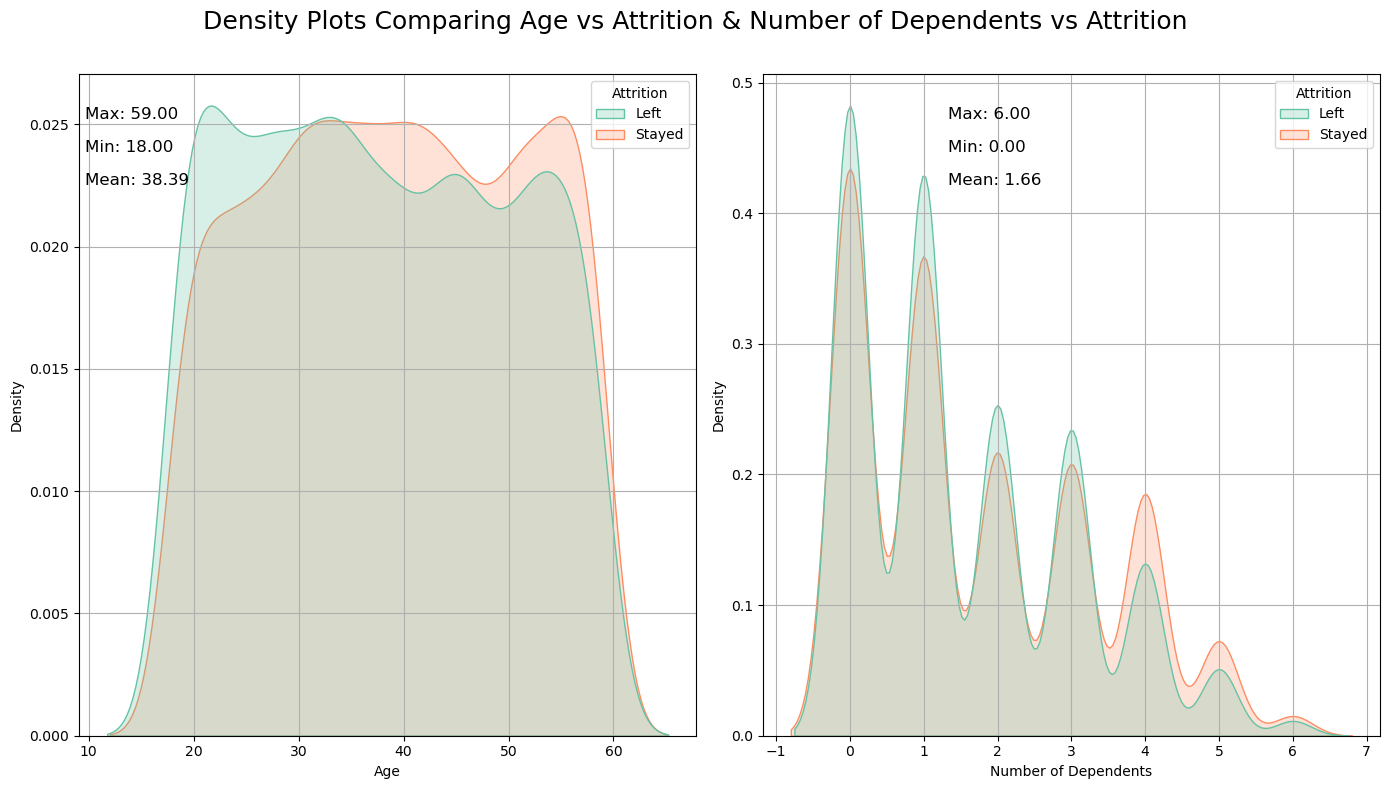

In [505]:
# Call the function
plot_density_attrition_with_age_and_dependents()

In [507]:
def plot_attrition_by_demographics():

    employee_data = pd.read_csv("test.csv", index_col='Employee ID')

    plt.figure(figsize=(14,8))

    # Gender vs Attrition
    plt.subplot(1, 3, 1)
    sns.countplot(data=employee_data, x='Gender', hue='Attrition', palette='pastel')
    plt.title('Attrition by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Attrition', labels=['Stayed', 'Left'], loc='upper right')
    plt.grid(True)

    # Marital Status vs Attrition
    plt.subplot(1, 3, 2)
    sns.countplot(data=employee_data, x='Marital Status', hue='Attrition', palette='pastel')
    plt.title('Attrition by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.legend(title='Attrition', labels=['Stayed', 'Left'], loc='upper right')
    plt.grid(True)
    
    # Education Level vs Attrition
    plt.subplot(1, 3, 3)
    sns.countplot(data=employee_data, x='Education Level', hue='Attrition', palette='pastel')
    plt.title('Attrition by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Attrition', labels=['Stayed', 'Left'], loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.tight_layout()

    # Save as PNG image
    plt.savefig("Marital Status, Education Level, and Gender.png", dpi=300, bbox_inches='tight')

    plt.show()


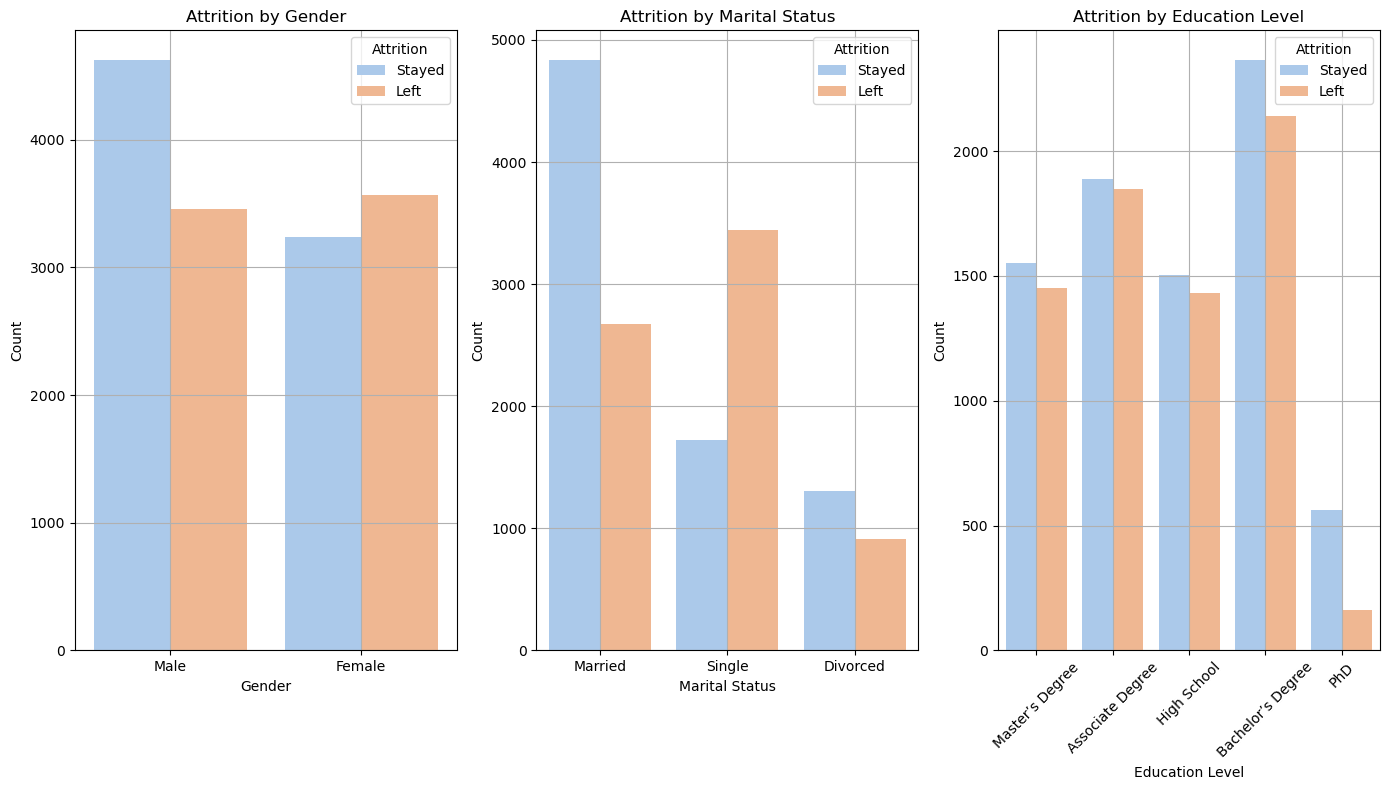

In [509]:
 plot_attrition_by_demographics()

In [511]:
# Csv Table Creation
employee_data = pd.read_csv("test.csv", index_col='Employee ID')
if employee_data["Attrition"].dtype == 'object':
    employee_data["Attrition"] = employee_data["Attrition"].map({"Stayed": 0, "Left": 1})

# Split data into groups as stayed and left
stayed = employee_data[employee_data["Attrition"] == 0]
left = employee_data[employee_data["Attrition"] == 1]

# Get Numerical features only
numerical_features = [
    "Age", "Years at Company", "Monthly Income", "Number of Promotions", 
    "Distance from Home", "Company Tenure", "Number of Dependents"
]

# Create numerical summary
numerical_summary = []
for feature in numerical_features:
    if feature in employee_data.columns:
        # Calculate averages
        stayed_mean = stayed[feature].mean() if not stayed[feature].isnull().all() else None
        left_mean = left[feature].mean() if not left[feature].isnull().all() else None
        difference = left_mean - stayed_mean if stayed_mean is not None and left_mean is not None else None
        
        numerical_summary.append({
            "Feature": feature,
            "Stayed (Avg)": round(stayed_mean, 2) if stayed_mean is not None else None,
            "Left (Avg)": round(left_mean, 2) if left_mean is not None else None,
            "Difference": round(difference, 2) if difference is not None else None
        })

numerical_summary_df = pd.DataFrame(numerical_summary)

# Save the numerical summary to a CSV
numerical_summary_df.to_csv('numerical_summary.csv', index=False)

# Get Categorical feature Only
categorical_features = [
    "Gender", "Job Role", "Work-Life Balance", "Job Satisfaction", 
    "Performance Rating", "Education Level", "Marital Status", 
    "Job Level", "Company Size", "Remote Work", "Leadership Opportunities",
    "Innovation Opportunities", "Company Reputation", "Employee Recognition"
]

# Create categorical summary
categorical_summary = []
for feature in categorical_features:
    if feature in employee_data.columns:
        # Calculate the percentage of employees who stayed and left
        stayed_count = stayed[feature].value_counts(normalize=True) * 100
        left_count = left[feature].value_counts(normalize=True) * 100
        
        # Add round
        stayed_count_rounded = stayed_count.round(2)
        left_count_rounded = left_count.reindex(stayed_count.index, fill_value=0).round(2)
        
        # Merge both tables into a summary for the feature
        feature_summary = pd.DataFrame({
            "Category": stayed_count.index,
            "Stayed (%)": stayed_count_rounded.values,
            "Left (%)": left_count_rounded.values
        })
        
        feature_summary["Difference (%)"] = round(feature_summary["Left (%)"] - feature_summary["Stayed (%)"], 2)
        
        # Add the feature summary to the list
        categorical_summary.append({
            "Feature": feature,
            "Summary": feature_summary
        })

# Save categorical summaries
for item in categorical_summary:
    feature_name = item["Feature"]
    feature_summary = item["Summary"]
    
    # Save each categorical summary as a CSV file
    feature_summary.to_csv(f'{feature_name}_summary.csv', index=False)

print("CSV files have been saved successfully.")


CSV files have been saved successfully.


In [473]:
# Csv Table Creation
# Select numerical columns only
numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 
                     'Distance from Home', 'Company Tenure']

# Create a DataFrame with the summary statistics of the numerical columns
numerical_summary = employee_data[numerical_columns].describe()

# Round to 2 decimal places
numerical_summary = numerical_summary.round(2)

# Save to a CSV file
numerical_summary.to_csv('numerical_summary.csv')

print("CSV file 'numerical_summary.csv' with summary statistics has been created.")

CSV file 'numerical_summary.csv' with summary statistics has been created.
